In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2. Transformers가 할 수 있는 일들

## 감정 분석

In [3]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis") # 감정
classifier(["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

## zero-shot 분류

In [4]:
classifier = pipeline("zero-shot-classification")
classifier("This is a course about the Transformers library", 
           candidate_labels = ["education", "politics", "business"],)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445988297462463, 0.11197440326213837, 0.04342682659626007]}

## 텍스트 생성

In [5]:
generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': "In this course, we will teach you how to build a well-rounded and intuitive Android Android web app using CSS, HTML and Java. We will also learn about and learn about how developers can make use of Google's advanced web developer tools. It"}]

In [6]:
generator = pipeline("text-generation", model = "distilgpt2")
generator("In this course, we will teach you how to", max_length = 30, num_return_sequences = 2,)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to write code in a single program and how to generate code. As you can see in the tutorial,'},
 {'generated_text': 'In this course, we will teach you how to use and use the skills you learn from their presentations to build and expand your knowledge of the technology and'}]

## Mask filling

In [7]:
unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k = 2)

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.19619810581207275,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04052736610174179,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

## 개체명 인식

In [8]:
ner = pipeline("ner", grouped_entities = True)
ner("My name is Sylvian and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:136: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  "`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to"


[{'entity_group': 'PER',
  'score': 0.9987378,
  'word': 'Sylvian',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9692885,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9937913,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

## 질의 응답

In [9]:
question_answerer = pipeline("question-answering")
question_answerer(question = "Where do I work?", 
                  context = "My name is Sylvain and I work at Hugging Face in Brooklyn")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.6949766278266907, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

## 자동 요약

In [10]:
summarizer = pipeline("summarization") 
summarizer( 
    """ America has changed dramatically during recent years. Not only has the 
    number of graduates in traditional engineering disciplines such as mechanical, 
    civil, electrical, chemical, and aeronautical engineering declined, 
    but in most of the premier American universities engineering curricula 
    now concentrate on and encourage largely the study of engineering science. 
    As a result, there are declining offerings in engineering subjects 
    dealing with infrastructure, the environment, and related issues, 
    and greater concentration on high technology subjects, largely supporting 
    increasingly complex scientific developments. While the latter is important, 
    it should not be at the expense of more traditional engineering. 
    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering 
    graduates and a lack of well-educated engineers. 
    """ 
    )

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' America has changed dramatically during recent years . The number of graduates in traditional engineering disciplines has declined . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering . There are declining offerings in engineering subjects dealing with infrastructure, the environment, and related issues .'}]

## 기계 번역

In [11]:
translator = pipeline("translation", model = "Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'This course is produced by Hugging Face.'}]

## 편견과 한계

In [13]:
unmasker = pipeline("fill-mask", model = "bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


꼭 인코더, 디코더를 같이 사용해야 하는 것은 아니고, 작업의 종류에 따라 인코더만 혹은 디코더만도 사용이 가능하다.  

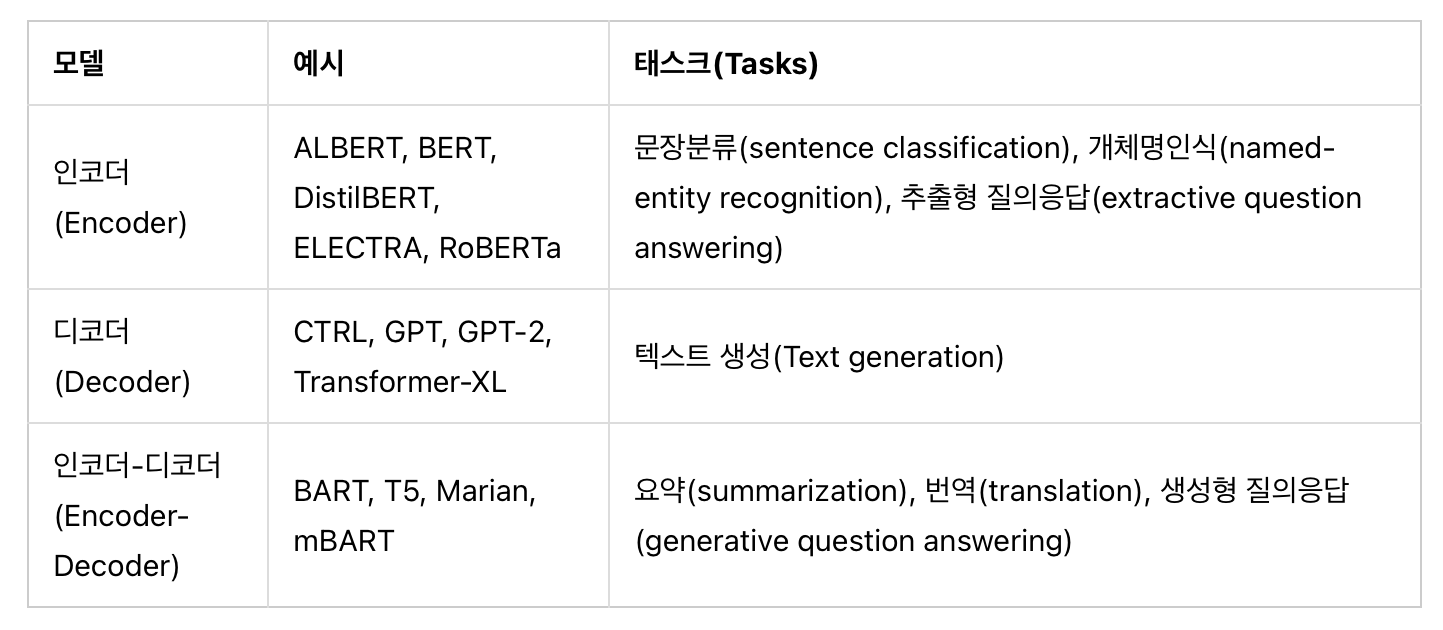